 - Atribute information Analysis.
 - Categorical to Continuous/Dummies Easy way
 - Machine Learning (Logistic Regression, KNN, SVM, Decision Tree, Random Forest, GradientBoostingClassifier, XGBClassifier, GaussianNB)    
 - ROC curve
 - How to understand the problem and see which is the best model for your Dependent Variable
 - Precision, Recall, F1, Avg_total Analysis
 

##  Bank Marketing


**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 



In [23]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Load Dataset 
bank = pd.read_csv("./bank-full.csv")
bank.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [222]:
#Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [223]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()
# bank.isnull().any() # one way to search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [224]:
bank.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# 1. Bank client data Analysis and Categorical Treatment
- Work with the atributes related to bank clients
- To make things more clear, i'm going to creat a new datasets that contains just this part of data

In [269]:
#bank_client = bank.iloc[: , 0:7]
bank_client = bank[['age','job','marital','education','default','balance','housing','loan']]

bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


## 1.1. Knowing the categorical variables

In [226]:
# knowing the categorical variables
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [227]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced']


In [228]:
print('Education:\n', bank_client['education'].unique())

Education:
 ['tertiary' 'secondary' 'unknown' 'primary']


In [229]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'yes']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']


## 1.2. Age
- Trying to find some insights crossing those variables

In [230]:
#Trying to find some strange values or null values
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  95
Max age:  18
Null Values:  False


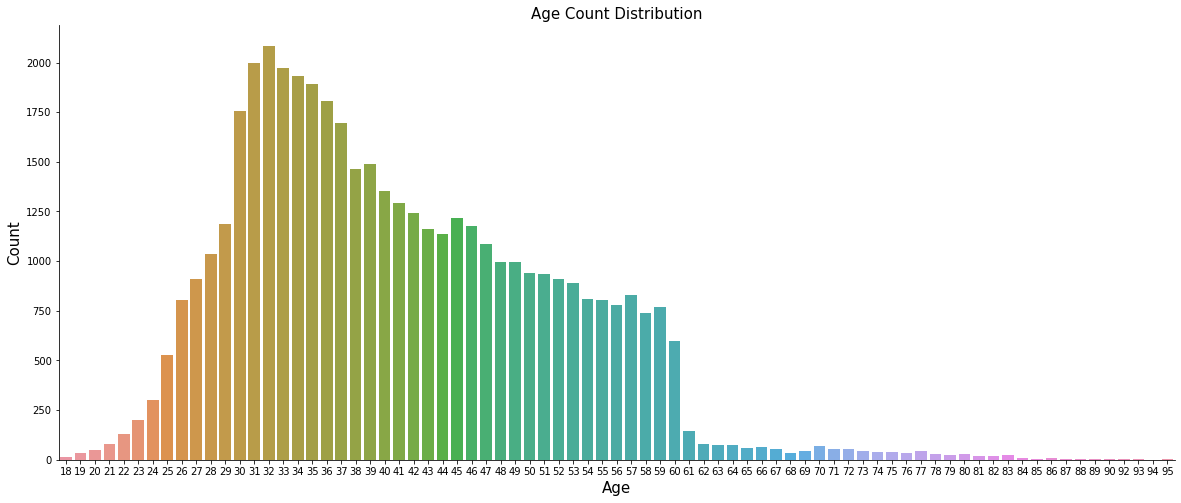

In [231]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

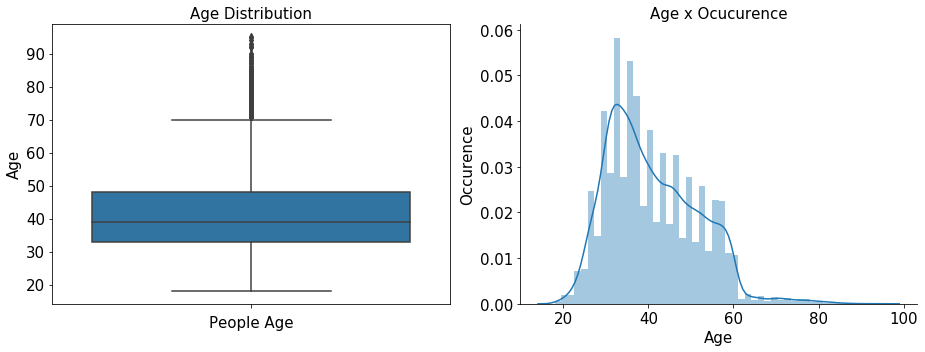

In [232]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [233]:
# Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
Ages above:  70.5 are outliers


In [234]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  554
Number of clients:  45211
Outliers are: 1.23 %


In [235]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.9
STD : 10.6
CV  : 25.9 , High middle dispersion


Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not.
The outliers was calculated, so my thinking is fit the model with and without them

## 1.3. JOBS

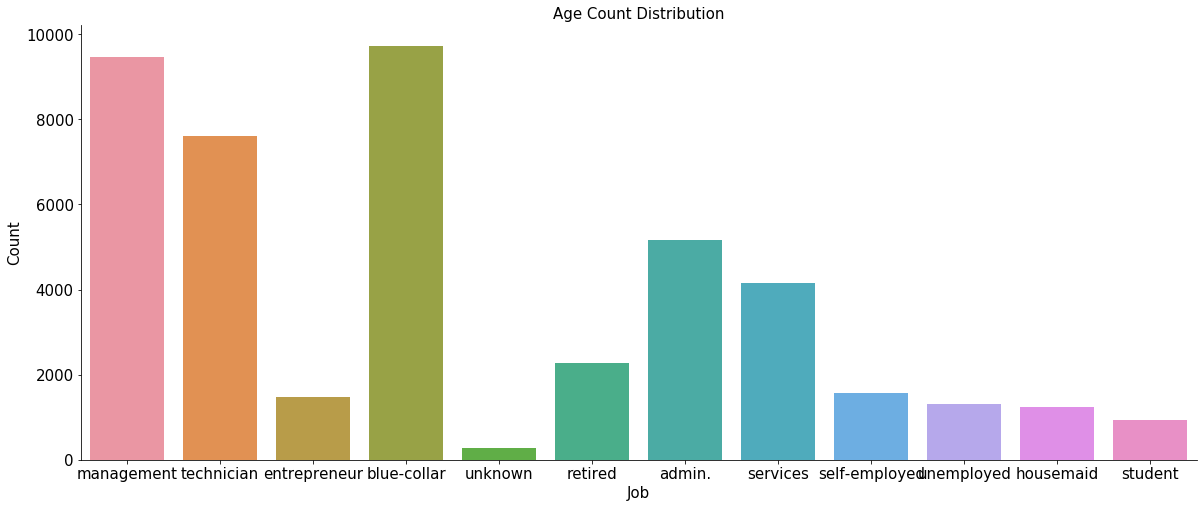

In [236]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## 1.4. MARITAL

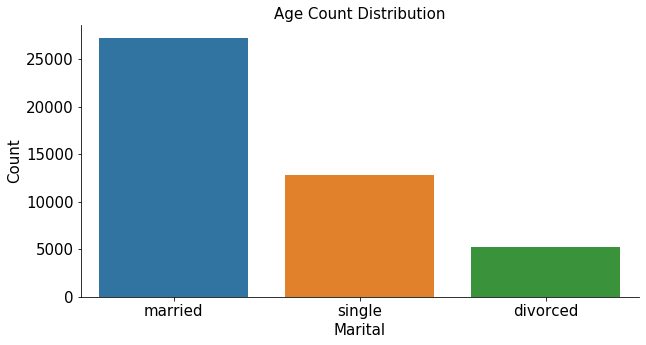

In [237]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## 1.5. EDUCATION

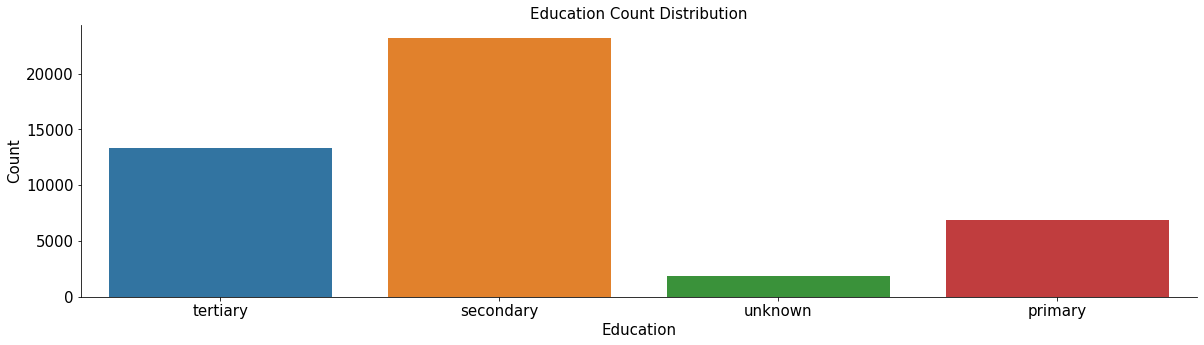

In [238]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## 1.6. DEFAULT, HOUSING, LOAN

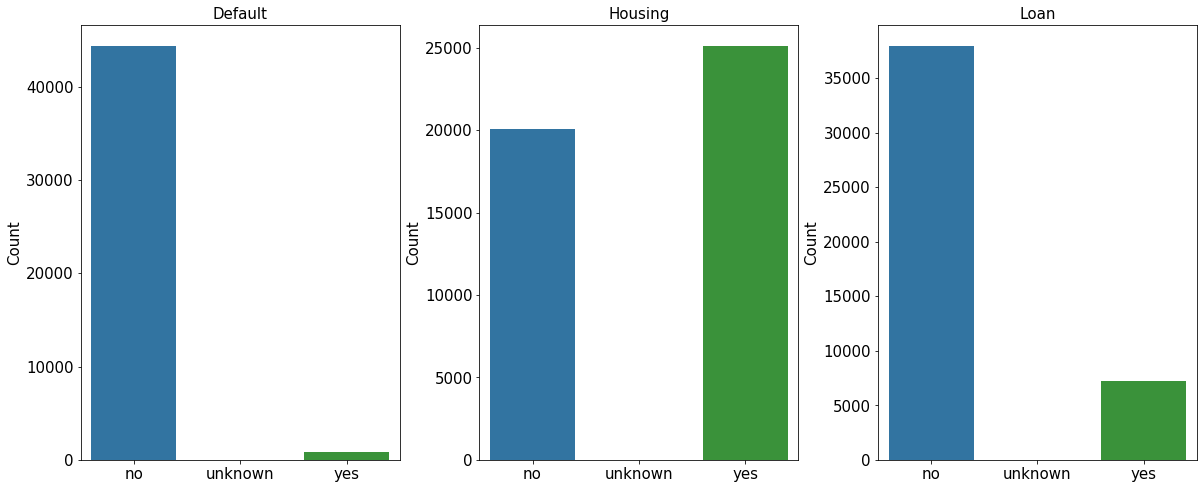

In [239]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [240]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 44396 
 Unknown credit in default: 0 
 Yes to credit in default: 815


In [241]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 20081 
 Unknown housing in loan: 0 
 Yes to housing in loan: 25130


In [242]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 37967 
 Unknown to personal loan: 0 
 Yes to personal loan: 7244


### BANK CLIENTS CONCLUSION
The ages dont mean to much, has a medium dispersion and dont make sense relate with other variables will not tell any insight

Jobs, Marital and Education i think the best analisys is just the count of each variable, if we related with the other ones its is not conclusive, all this kind of  variables has yes, unknown and no for loan, default and housing.

Default, loan and housing, its just to see the distribution of people.

## 1.7. Bank Client Categorical Treatment
- Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling will be apllyed later

In [276]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 


In [277]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [278]:
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,3,4,1,2,0,2143,1,0
1,2,9,2,1,0,29,1,0
2,2,2,1,1,0,2,1,1
3,2,1,1,3,0,1506,1,0
4,2,11,2,3,0,1,0,0


** Manualy way to convert Categorical in Continuous **
   >bank_client['job'].replace(['housemaid'   , 'services'  , 'admin.'    , 'blue-collar'  , 'technician',
                            'retired'     , 'management', 'unemployed', 'self-employed', 'unknown'   ,
                            'entrepreneur', 'student']  ,
                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

   >bank_client['education'].replace(['basic.4y'           , 'high.school', 'basic.6y', 'basic.9y',
                                  'professional.course', 'unknown'    , 'university.degree'   ,
                                  'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

   >bank_client['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)
    
   >bank_client['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
    
   >bank_client['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
    
   >bank_client['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

** A way to Converting Categorical variables using dummies if you judge necessary **
   >bank_client = pd.get_dummies(data = bank_client, columns = ['job']      , prefix = ['job']      , drop_first = True)
   
   >bank_client = pd.get_dummies(data = bank_client, columns = ['marital']  , prefix = ['marital']  , drop_first = True)
   
   >bank_client = pd.get_dummies(data = bank_client, columns = ['education'], prefix = ['education'], drop_first = True)
   
   >bank_client = pd.get_dummies(data = bank_client, columns = ['default']  , prefix = ['default']  , drop_first = True)
   
   >bank_client = pd.get_dummies(data = bank_client, columns = ['housing']  , prefix = ['housing']  , drop_first = True)
   
   >bank_client = pd.get_dummies(data = bank_client, columns = ['loan']     , prefix = ['loan']     , drop_first = True)

In [279]:
print(bank_client.shape)
bank_client.head()

(45211, 8)


,age,job,marital,education,default,balance,housing,loan
0,3,4,1,2,0,2143,1,0
1,2,9,2,1,0,29,1,0
2,2,2,1,1,0,2,1,1
3,2,1,1,3,0,1506,1,0
4,2,11,2,3,0,1,0,0


# 2. Related with the last contact of the current campaign
- Treat categorical, see those values
- group continuous variables if necessary


In [280]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 8:12]
bank_related.head()

,contact,day,month,duration
0,unknown,5,may,261
1,unknown,5,may,151
2,unknown,5,may,76
3,unknown,5,may,92
4,unknown,5,may,198


In [281]:
bank_related.isnull().any()

contact     False
day         False
month       False
duration    False
dtype: bool

In [282]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
#print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['unknown' 'cellular' 'telephone']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


## 2.1 Duration

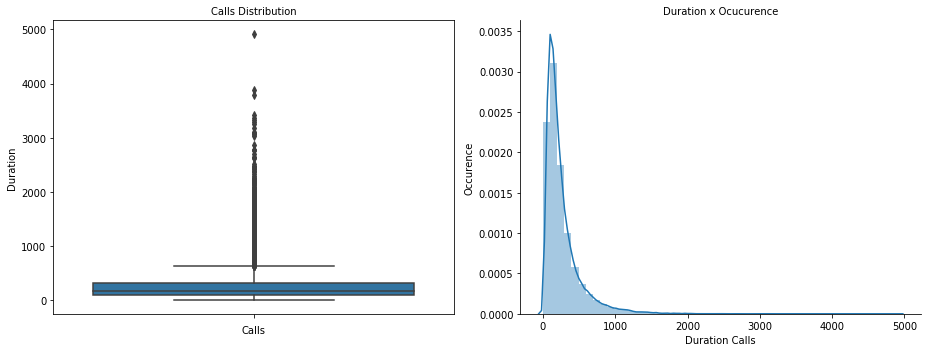

In [283]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

##### PLease note: duration is different from age, Age has 78  values and Duration has 1544 different values

In [284]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [285]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  643.0 are outliers


In [286]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  3222
Number of clients:  45211
Outliers are: 7.13 %


In [287]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


## 2.2 Contact, Month, Day of Week

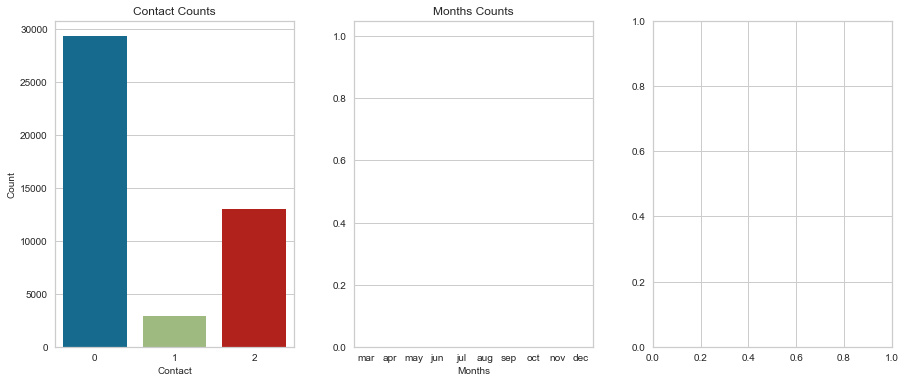

In [389]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

#sns.countplot(bank_related['day_of_week'], ax = ax3)
#ax3.set_xlabel('Day of Week', fontsize = 10)
#ax3.set_ylabel('')
#ax3.set_title('Day of Week Counts')
#ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [289]:
print('Ages above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  643.0 are outliers


In [290]:
bank_related[bank_related['duration'] > 640].count()

contact     3272
day         3272
month       3272
duration    3272
dtype: int64

## 2.1 Contact, Month, Day of Week treatment

In [291]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
#bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

** A way to Converting Categorical variables using dummies if you judge necessary **
   >bank_related = pd.get_dummies(data = bank_related, prefix = ['contact']    , columns = ['contact']    , drop_first = True)
   
   >bank_related = pd.get_dummies(data = bank_related, prefix = ['month']      , columns = ['month']      , drop_first = True)
   
   >bank_related = pd.get_dummies(data = bank_related, prefix = ['day_of_week'], columns = ['day_of_week'], drop_first = True)

In [292]:
bank_related.head()

,contact,day,month,duration
0,2,5,8,261
1,2,5,8,151
2,2,5,8,76
3,2,5,8,92
4,2,5,8,198


In [293]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [294]:
bank_related.head()

,contact,day,month,duration
0,2,5,8,3
1,2,5,8,2
2,2,5,8,1
3,2,5,8,1
4,2,5,8,3


# Social and economic context attributes

# Other attributes

In [295]:
bank_ot = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_ot.head()

,campaign,pdays,previous,poutcome
0,1,-1,0,unknown
1,1,-1,0,unknown
2,1,-1,0,unknown
3,1,-1,0,unknown
4,1,-1,0,unknown


In [296]:
bank_ot['poutcome'].unique()


array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [297]:
bank_ot['poutcome'].replace(['unknown','failure','other', 'success'], [1,2,3,4], inplace  = True)

In [390]:
bank_ot.head()

,campaign,pdays,previous,poutcome
0,1,-1,0,1
1,1,-1,0,1
2,1,-1,0,1
3,1,-1,0,1
4,1,-1,0,1


# Model

In [299]:
bank_final= pd.concat([bank_client, bank_related, bank_ot], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'balance','housing', 'loan',
                     'contact', 'day','month', 'duration',  'campaign', 'pdays', 'previous', 'poutcome']]



bank_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,1
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,1
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,1


In [300]:
y.head()

,['y']_yes
0,0
1,0
2,0
3,0
4,0


In [301]:
#y = y.replace(to_replace = ['yes','no'],value = [1,0]) 
y

,['y']_yes
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [302]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [303]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4596,1,1,2,1,0,5607,0,0,2,20,8,3,1,-1,0,1
1020,2,2,1,2,0,1722,1,0,2,7,8,4,2,-1,0,1
16026,3,3,1,0,0,0,0,1,1,22,5,2,1,-1,0,1
2085,2,1,1,1,0,194,1,0,2,12,8,4,7,-1,0,1
6961,1,1,1,0,0,2607,1,0,2,28,8,2,10,-1,0,1


In [304]:
y.head()

,['y']_yes
0,0
1,0
2,0
3,0
4,0


In [305]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [306]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score , accuracy_score, f1_score
from sklearn import metrics

In [364]:
temp_list_accuracy=[]
temp_list_precision=[]
temp_list_recall=[]

In [373]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)

# Confusion Matrix
conf_svc = metrics.confusion_matrix(y_test, svcpred)
print(conf_dt)

#print(round(accuracy_score(y_test, svcpred),2)*100)
#SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

# Calculating 
acc1 = accuracy_score(y_test, svcpred)
prec1 = precision_score(y_test, svcpred)
rec1 = recall_score(y_test, svcpred)

#resultss = pd.DataFrame([['SVM (Linear)', acc1, prec1, rec1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall'])
#print(results)

#print("Accuracy Score :",acc1 * 100)
#print("PRECISION SCORE :",prec1)
#print("RECALL SCORE :", rec1)
#temp_list_accuracy.append(acc1)
#temp_list_precision.append(prec1)
#temp_list_recall.append(rec1)

[[7150  571]
 [ 560  501]]


[[7034  687]
 [ 755  306]]


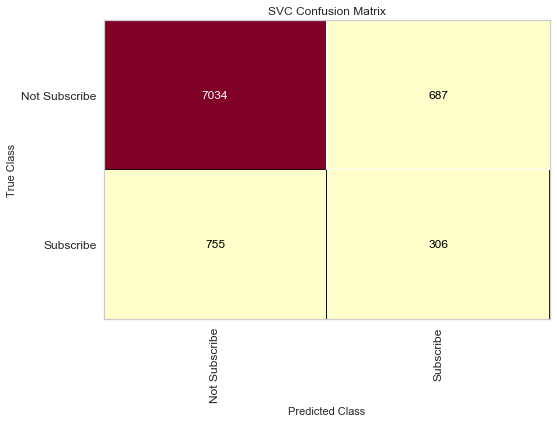

<Figure size 576x396 with 0 Axes>

In [333]:


# Instantiate the visualizer with the classification model
from yellowbrick.classifier import confusion_matrix
confusion_matrix(
    SVC(kernel = 'sigmoid'),
    X_train, y_train, X_test, y_test,
    classes=['Not Subscribe', 'Subscribe']
)
plt.tight_layout()

In [375]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

# Confusion Matrix
conf_dt = metrics.confusion_matrix(y_test, dtreepred)
print(conf_dt)

#print(round(accuracy_score(y_test, dtreepred),2)*100)
#DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

# Calculating 
acc2 = accuracy_score(y_test, dtreepred)
prec2 = precision_score(y_test, dtreepred)
rec2 = recall_score(y_test, dtreepred)

model_results_decision_tree = pd.DataFrame([['Decision Tree', acc2, prec2, rec2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall'])

resultss = resultss.append(model_results_decision_tree, ignore_index = True)

#print("Accuracy Score :",acc2 * 100)
#print("PRECISION SCORE :",prec2)
#print("RECALL SCORE :", rec2)
#temp_list_accuracy.append(acc2)
#temp_list_precision.append(prec2)
#temp_list_recall.append(rec2)

[[7149  572]
 [ 551  510]]


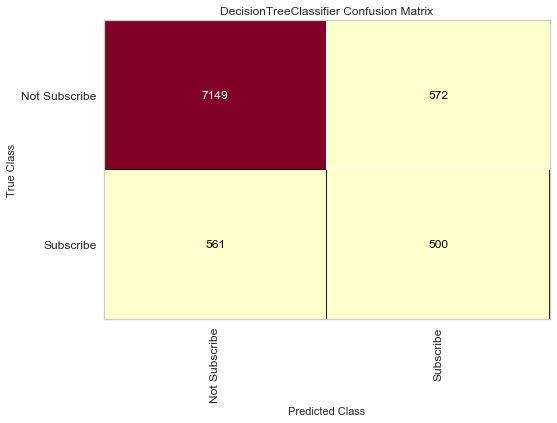

<Figure size 576x396 with 0 Axes>

In [345]:

# Instantiate the visualizer with the classification model
from yellowbrick.classifier import confusion_matrix
confusion_matrix(
    DecisionTreeClassifier(criterion='gini'),
    X_train, y_train, X_test, y_test,
    classes=['Not Subscribe', 'Subscribe']
)
plt.tight_layout()

In [385]:
print(temp_list_accuracy)
print(temp_list_precision)
print(temp_list_recall)

(0.8358005010248235, 0.8712138465042132, 0.8361421088590298, 0.8950125256205875)
(0.3081570996978852, 0.4673507462686567, 0.36020710059171596, 0.6488222698072805)
(0.2884071630537229, 0.472196041470311, 0.4590009425070688, 0.2855796418473139)


In [377]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

conf_nb = metrics.confusion_matrix(y_test, gaussiannbpred)
print(conf_dt)
#print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
#GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

# Calculating 
acc3 = accuracy_score(y_test, gaussiannbpred)
prec3 = precision_score(y_test, gaussiannbpred)
rec3 = recall_score(y_test, gaussiannbpred)

model_results_navie_bayes = pd.DataFrame([['Naive Bayes (Gaussian)', acc3, prec3, rec3]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall',])

resultss = resultss.append(model_results_navie_bayes, ignore_index = True)



print("Accuracy Score :",acc3 * 100)
print("PRECISION SCORE :",prec3)
print("RECALL SCORE :", rec3)
temp_list_accuracy.append(acc3)
temp_list_precision.append(prec3)
temp_list_recall.append(rec3)

[[7149  572]
 [ 551  510]]
Accuracy Score : 83.61421088590298
PRECISION SCORE : 0.36020710059171596
RECALL SCORE : 0.4590009425070688


In [379]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


#Building model
#model=keras.Sequential([keras.layers.Dense(units = 12, activation='relu',input_shape=( 7 ,)),
#                   keras.layers.Dense(units = 8,  activation = 'relu'),
#                       keras.layers.Dense(units = 1,  activation = 'sigmoid')
#                       ])

model=keras.Sequential([keras.layers.Dense(units = 12, activation='relu',input_shape=( 16 ,)),
                   keras.layers.Dense(units = 8,  activation = 'relu'),
                        keras.layers.Dense(units = 8,  activation = 'relu'),
                       keras.layers.Dense(units = 1,  activation = 'sigmoid')
                       ])
                      

#optimization
model.compile(optimizer='sgd', #Stochastic gradient descent optimizer.
              loss='binary_crossentropy', #Used for binary classification
              metrics=['accuracy'])

#Traing the model
hist = model.fit(X_train, y_train,
          batch_size=50, epochs=50, validation_split=0.2)

#Make a prediction & print the actual values
y_pred_ann = model.predict(X_test)
y_pred_ann  = [1 if y>=0.5 else 0 for y in y_pred_ann] #Threshold

acc4 = accuracy_score(y_test, y_pred_ann)
prec4 = precision_score(y_test, y_pred_ann)
rec4 = recall_score(y_test, y_pred_ann)

model_results_ann = pd.DataFrame([['ANN', acc4, prec4, rec4]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall'])

resultss = resultss.append(model_results_ann, ignore_index = True)
#print(model_results_ann)

print("Accuracy Score :",acc4 * 100)
print("PRECISION SCORE :",prec4)
print("RECALL SCORE :", rec4)
temp_list_accuracy.append(acc4)
temp_list_precision.append(prec4)
temp_list_recall.append(rec4)

Train on 29143 samples, validate on 7286 samples
Epoch 1/50
29143/29143 [==============================] - 2s 72us/sample - loss: 0.4308 - acc: 0.8835 - val_loss: 0.3797 - val_acc: 0.8783
Epoch 2/50
29143/29143 [==============================] - 1s 47us/sample - loss: 0.3511 - acc: 0.8854 - val_loss: 0.3527 - val_acc: 0.8783
Epoch 3/50
29143/29143 [==============================] - 1s 42us/sample - loss: 0.3301 - acc: 0.8854 - val_loss: 0.3344 - val_acc: 0.8783
Epoch 4/50
29143/29143 [==============================] - 1s 42us/sample - loss: 0.3108 - acc: 0.8854 - val_loss: 0.3129 - val_acc: 0.8789
Epoch 5/50
29143/29143 [==============================] - 1s 42us/sample - loss: 0.2897 - acc: 0.8888 - val_loss: 0.2930 - val_acc: 0.8842
Epoch 6/50
29143/29143 [==============================] - 1s 51us/sample - loss: 0.2729 - acc: 0.8931 - val_loss: 0.2795 - val_acc: 0.8873
Epoch 7/50
29143/29143 [==============================] - 1s 43us/sample - loss: 0.2628 - acc: 0.8941 - val_loss: 0.2

In [380]:
resultss

,Model,Accuracy,Precision,Recall
0,SVM (Linear),0.835801,0.308157,0.288407
1,Decision Tree,0.872125,0.471349,0.480679
2,Naive Bayes (Gaussian),0.836142,0.360207,0.459001
3,ANN,0.895013,0.648822,0.285580


In [381]:
def convert(list): 
    return tuple(list) 

In [382]:
temp_list_accuracy= convert(temp_list_accuracy)
temp_list_precision= convert(temp_list_precision)
temp_list_recall= convert(temp_list_recall)

In [383]:
print(temp_list_accuracy)
print(temp_list_precision)
print(temp_list_recall)

(0.8358005010248235, 0.8712138465042132, 0.8361421088590298, 0.8950125256205875)
(0.3081570996978852, 0.4673507462686567, 0.36020710059171596, 0.6488222698072805)
(0.2884071630537229, 0.472196041470311, 0.4590009425070688, 0.2855796418473139)


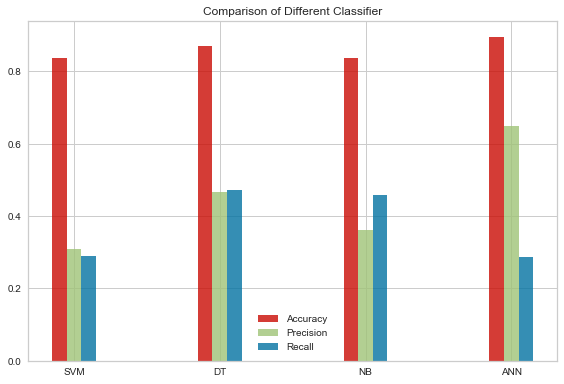

In [384]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
precision_tuple =temp_list_accuracy
accuracy_tuple = temp_list_precision 
recall_tuple = temp_list_recall

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, precision_tuple, bar_width, alpha=opacity, color='r',label='Accuracy')
rects2 = plt.bar(index + bar_width, accuracy_tuple, bar_width, alpha=opacity, color='g',label='Precision')
rects3 = plt.bar(index + bar_width+bar_width, recall_tuple, bar_width,alpha=opacity,color='b',label='Recall')


plt.title('Comparison of Different Classifier')
plt.xticks(index + bar_width, ('SVM', 'DT', 'NB', 'ANN'))
plt.legend()

plt.tight_layout()
plt.show()

**Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.**

**A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:**

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

In [ ]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)


In [ ]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

# ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**
- False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
- False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.

**In my opinion:**
- The first one its most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings 
- The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client

### So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.
Obs1 - lets go back and look the best confusion matrix that attend this criteria
Obs2 - i'll do the math manualy to be more visible and understanding

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

In [ ]:
print('KNN Reports\n',classification_report(y_test, knnpred))

# CHOOSED MODEL ANALYSIS
# RECALL

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://i68.tinypic.com/iyj4fc.jpg")

##### Recall - Specificity #####
TN / (TN + FP) [ MATRIX LINE 1 ]

 - For all NEGATIVE(0) **REAL** VALUES how much we predict correct ?

 - other way to understand, our real test set has 7163+116 = 7279 clients that didin't subscribe(0), and our model predict 98% correct or 7163 correct and 116 incorrect   

In [ ]:
print(round(7163 /(7163 + 116),2))

##### Recall - Sensitivity #####
TP / (TP + FN) [ MATRIX LINE 2 ]

 - For all POSITIVE(1) **REAL** VALUES how much we predict correct ?

 - other way to understand, our real test set has 706 + 253 = 959 clients that subscribe(1), and our model predict 26% correct or 253 correct and 706 incorrect, **BUT REMEMBER, its best we miss by False negative instead of False Positive**

In [ ]:
print(round(253 / (253 + 706  ),2))
print(round(metrics.recall_score(y_test, knnpred),2))

# PRECISION

##### Precision  #####
TN / (TN + FN) [ MATRIX COLUMN 1 ]

- For all NEGATIVE(0) **PREDICTIONS** by our model, how much we predict correct ?

- other way to understand, our model pointed 7163 + 706 = 7869 clients that didin't subscribe(0), and our model predict 91% correct or 7163 correct and 706 incorrect   

In [ ]:
print(round(7163 / (7163 + 706),2))

##### Precision  #####
TN / (TN + FN) [ MATRIX COLUMN 1 ]

- For all POSITIVE(1) **PREDICTIONS** by our model, how much we predict correct ?

- other way to understand, our model pointed 116 + 253 = 369 clients that subscribe(1), and our model predict 69% correct or 253 correct and 116 incorrect   

In [ ]:
print(round(253 / (253 + 116),2))
print(round(metrics.precision_score(y_test, knnpred),2))

# F1-SCORE
- F1-Score is a "median" of Recall and Precision, consider this when you want a balance between this metrics

F1 = 2(*Precision(0) * Recall(0)) / (Precision(0) + Recall(0))

In [ ]:
F1_0 = 2*0.91*0.98/(0.91+0.98)
round(F1_0,2)

In [ ]:
F1_1 = 2*0.69*0.26/(0.69+0.26)
round(F1_1,2)

# AVG/ TOTAL
 - this consider the weights of sum of REAL VALUES [line 1] [line2]


In [ ]:
AVG_precision =  (0.91*(7279/8238))+ (0.69*(959/8238))
round(AVG_precision,2)

In [ ]:
AVG_Recall =  (0.98*(7279/8238))+ (0.26*(959/8238))
round(AVG_Recall,2)

In [ ]:
AVG_f1 =  (0.95*(7279/8238))+ (0.38*(959/8238))
round(AVG_f1,2)

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://i68.tinypic.com/iyj4fc.jpg")